# Description/Overview of the data tables used

Overviews, descriptive statistics of the data table.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
combined_table = pd.read_csv('results_2023_10_18/combined_data_table.csv', dtype={'public_client_id': str})

/tmp/ipykernel_1361627/3589811407.py:1: DtypeWarning: Columns (992) have mixed types. Specify dtype option on import or set low_memory=False.
  combined_table = pd.read_csv('results_2023_10_18/combined_data_table.csv', dtype={'public_client_id': str})


Text(0.5, 1.0, 'days in program')

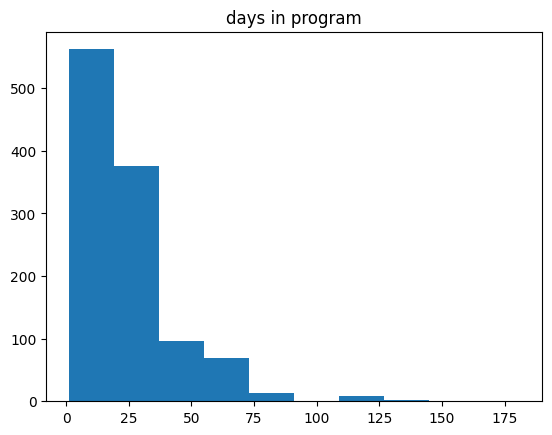

In [3]:
plt.hist(combined_table.days_in_program)
plt.title('days in program')

## Aggregate data statistics

In [4]:
combined_table.agg({'age': ['count', 'min', 'mean', 'median', 'max', 'std'],
                    'bmi': ['count', 'min', 'mean', 'median', 'max', 'std'],
                    'GLYCOHEMOGLOBIN A1C': ['count', 'min', 'mean', 'median', 'max', 'std'],
                    'GLUCOSE': ['count', 'min', 'mean', 'median', 'max', 'std'],
                    'GFR, MDRD': ['count', 'min', 'mean', 'median', 'max', 'std'],
                    'INSULIN': ['count', 'min', 'mean', 'median', 'max', 'std'],
                    'HOMA-IR': ['count', 'min', 'mean', 'median', 'max', 'std'],}).T

,count,min,mean,median,max,std
age,1131.0,18.000000,49.526083,49.000000,87.000000,11.291785
bmi,1131.0,17.739594,27.628528,26.149654,53.349371,6.036962
GLYCOHEMOGLOBIN A1C,1131.0,3.600000,5.505305,5.500000,8.300000,0.432617
GLUCOSE,1131.0,70.000000,93.242263,91.000000,199.000000,12.176272
"GFR, MDRD",1131.0,41.000000,90.173298,90.000000,131.000000,15.171761
INSULIN,1131.0,1.400000,10.668877,8.900000,55.100000,7.341579
HOMA-IR,1131.0,0.245432,2.558971,1.977778,20.342222,2.161769


In [5]:
combined_table.agg({'d_HbA1C': ['count', 'min', 'mean', 'median', 'max', 'std'],
                    'd_GLUCOSE': ['count', 'min', 'mean', 'median', 'max', 'std'],
                    'd_GFR': ['count', 'min', 'mean', 'median', 'max', 'std'],
                    'd_INSULIN': ['count', 'min', 'mean', 'median', 'max', 'std'],
                    'd_HOMA-IR': ['count', 'min', 'mean', 'median', 'max', 'std'],}).T

,count,min,mean,median,max,std
d_HbA1C,1131.0,-1.500000,-0.047834,-0.100000,1.400000,0.294044
d_GLUCOSE,1131.0,-49.000000,-0.482759,0.000000,39.000000,7.780530
d_GFR,1131.0,-30.000000,1.035367,0.000000,45.000000,9.436260
d_INSULIN,1131.0,-31.500000,-0.887710,-0.400000,22.700000,4.968784
d_HOMA-IR,1131.0,-11.090123,-0.243662,-0.122963,7.090864,1.428360


In [6]:
combined_table.agg({'d_1y_HbA1C': ['count', 'min', 'mean', 'median', 'max', 'std'],
                    'd_1y_GLUCOSE': ['count', 'min', 'mean', 'median', 'max', 'std'],
                    'd_1y_GFR': ['count', 'min', 'mean', 'median', 'max', 'std'],
                    'd_1y_INSULIN': ['count', 'min', 'mean', 'median', 'max', 'std'],
                    'd_1y_HOMA-IR': ['count', 'min', 'mean', 'median', 'max', 'std'],}).T

,count,min,mean,median,max,std
d_1y_HbA1C,639.0,-1.900000,-0.111581,-0.100000,1.000000,0.308689
d_1y_GLUCOSE,639.0,-57.000000,-0.178404,1.000000,51.000000,8.889399
d_1y_GFR,639.0,-28.000000,-0.053208,0.000000,53.000000,10.444974
d_1y_INSULIN,639.0,-33.200000,-0.982942,-0.600000,54.400000,5.413038
d_1y_HOMA-IR,639.0,-12.895556,-0.250617,-0.113333,23.291111,1.803096


In [17]:
print('6mo d_HbA1C increase:', combined_table[combined_table['d_HbA1C'] > 0].shape[0])
print('6mo d_HbA1C decrease:', combined_table[combined_table['d_HbA1C'] < 0].shape[0])
print('6mo d_HbA1C no change:', combined_table[combined_table['d_HbA1C'] == 0].shape[0])

print('1y d_HbA1C increase:', combined_table[combined_table['d_1y_HbA1C'] > 0].shape[0])
print('1y d_HbA1C decrease:', combined_table[combined_table['d_1y_HbA1C'] < 0].shape[0])
print('1y d_HbA1C no change:', combined_table[combined_table['d_1y_HbA1C'] == 0].shape[0])

6mo d_HbA1C increase: 374
6mo d_HbA1C decrease: 604
6mo d_HbA1C no change: 153
1y d_HbA1C increase: 167
1y d_HbA1C decrease: 399
1y d_HbA1C no change: 73


In [18]:
combined_table['d_HbA1C_class'].sum()

185.0

In [19]:
combined_table['d_1y_HbA1C_class'].sum()

87.0

In [7]:
# TODO: do a plot of all the hba1c changes. the median change is decreasing, but this hides a substantial amount of variation.
#

## Plots of HbA1C changes over time

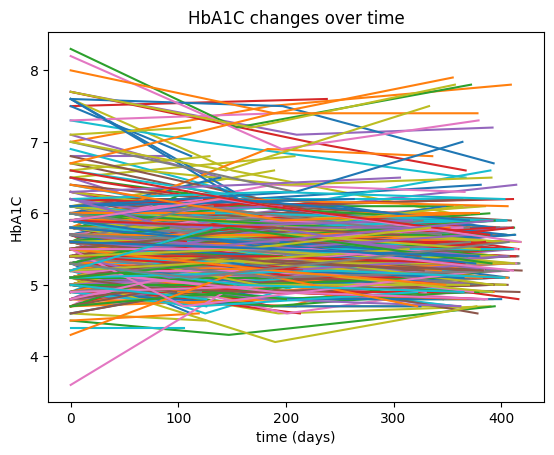

In [8]:
for i, row in combined_table.iterrows():
    plt.plot([0, row['days_til_next'], row['days_til_next_1y']], [row['GLYCOHEMOGLOBIN A1C'], row.next_HbA1C, row.next_1y_HbA1C])
plt.title('HbA1C changes over time')
plt.xlabel('time (days)')
plt.ylabel('HbA1C')
plt.savefig('images/hba1c_all_changes.png')
plt.show()

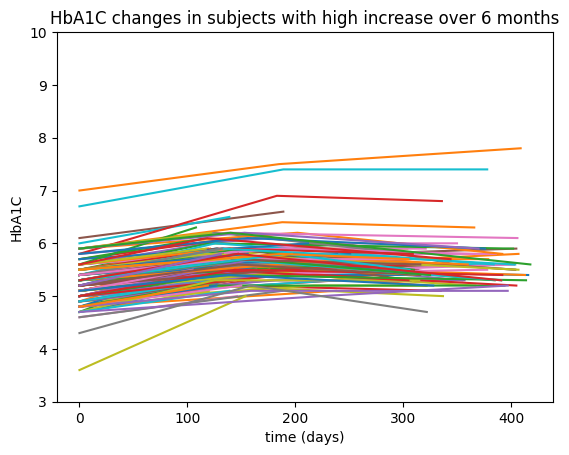

In [9]:
for i, row in combined_table.iterrows():
    if row['d_HbA1C_class']:
        plt.plot([0, row['days_til_next'], row['days_til_next_1y']], [row['GLYCOHEMOGLOBIN A1C'], row.next_HbA1C, row.next_1y_HbA1C])
plt.title('HbA1C changes in subjects with high increase over 6 months')
plt.xlabel('time (days)')
plt.ylabel('HbA1C')
plt.ylim(3, 10)
plt.savefig('images/hba1c_high_changes_t1.png')
plt.show()

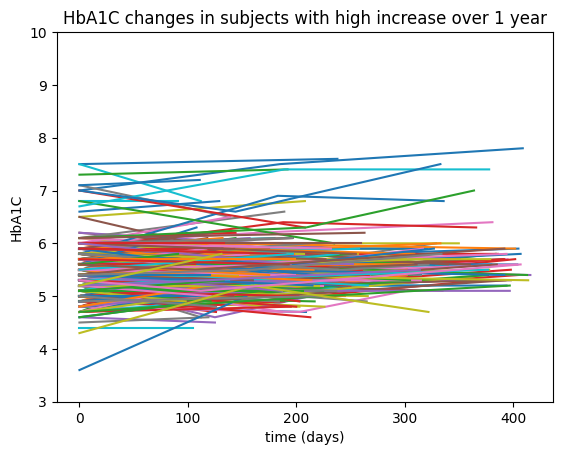

In [10]:
for i, row in combined_table.iterrows():
    if row['d_1y_HbA1C_class']:
        plt.plot([0, row['days_til_next'], row['days_til_next_1y']], [row['GLYCOHEMOGLOBIN A1C'], row.next_HbA1C, row.next_1y_HbA1C])
plt.title('HbA1C changes in subjects with high increase over 1 year')
plt.xlabel('time (days)')
plt.ylabel('HbA1C')
plt.ylim(3, 10)
plt.savefig('images/hba1c_high_changes_t2.png')
plt.show()

## Plots of ML predictions vs actual values for changes in HbA1C

In [11]:
# TODO: load data, columns
selected_columns_full = np.loadtxt('results_2023_10_18/selected_columns_full.txt', dtype=str, delimiter='\t').tolist()
chem_subset_cols = np.loadtxt('results_2023_10_18/chem_subset_cols.txt', dtype=str, delimiter='\t').tolist()
selected_chem_bp_cols = np.loadtxt('results_2023_10_18/selected_chem_bp_cols.txt', dtype=str, delimiter='\t').tolist()
selected_prot_cols = np.loadtxt('results_2023_10_18/selected_prot_cols.txt', dtype=str, delimiter='\t').tolist()
selected_met_cols = np.loadtxt('results_2023_10_18/selected_met_cols.txt', dtype=str, delimiter='\t').tolist()

# load model params

In [12]:
# identify proteins that are the same

In [13]:
prot_names = pd.read_csv('../arivale_data/arivale_prots.tsv', sep='\t')

In [14]:
gene_names = prot_names.groupby('gene_name')['index'].unique()

In [15]:
duplicate_gene_names = gene_names[gene_names.map(len) > 1]

In [16]:
duplicate_gene_names

gene_name
AREG,AREGB                            [IRE_P15514, ONC2_P15514]
BOC                                   [CRE_Q9BWV1, CVD2_Q9BWV1]
CCL11                                  [INF_P51671, IRE_P51671]
CCL2                                  [CVD3_P13500, INF_P13500]
CCL3                                  [CVD2_P10147, INF_P10147]
CXCL1                                 [CVD2_P09341, INF_P09341]
DCBLD2                                 [CRE_Q96PD2, IRE_Q96PD2]
ENTPD6                                 [CRE_O75354, ODA_O75354]
FGF21                     [CRE_Q9NSA1, CVD2_Q9NSA1, INF_Q9NSA1]
FGF23                                 [CVD2_Q9GZV9, INF_Q9GZV9]
FIGF                                  [CRE_O43915, CVD2_O43915]
GDNF                                  [INF_P39905, NEU1_P39905]
GPNMB                                 [NEX_Q14956, ONC2_Q14956]
HAVCR1                                [CVD2_Q96D42, ODA_Q96D42]
HGF                                   [INF_P14210, ONC2_P14210]
IL10                          

In [17]:
for index, ids in duplicate_gene_names.items():
    all_table_ids = []
    table_ids = []
    for i in ids:
        if i in combined_table.columns:
            table_ids.append(i)
            all_table_ids.append(combined_table[i])
    if len(all_table_ids) > 1:
        table_mean = combined_table[table_ids].mean(axis=1, skipna=True)
            
        correlations = np.corrcoef(combined_table[table_ids[0]].to_numpy(), combined_table[table_ids[1]].to_numpy())
        print(index, table_ids)
        print(correlations[0, 1])

In [18]:
np.corrcoef(combined_table[['CVD3_O00300', 'INF_O00300']].to_numpy().T)

KeyError: "['INF_O00300'] not in index"

In [ ]:
import sklearn.metrics

In [ ]:
plt.hist(combined_table['INSULIN'])

In [ ]:
combined_table[['GLYCOHEMOGLOBIN A1C', 'GFR, MDRD', 'GLUCOSE', 'INSULIN', 'HOMA-IR']].describe()

In [ ]:
(combined_table['INSULIN'] > 55).sum()

In [ ]:
(combined_table['GLUCOSE'] > 180).sum()

In [ ]:
(combined_table['HOMA-IR'] > 18).sum()

In [ ]:
((combined_table['HOMA-IR'] > 15) & (combined_table['INSULIN'] > 55)).sum()

In [ ]:
plt.scatter(combined_table['HOMA-IR'], combined_table['INSULIN'])

In [ ]:
combined_table['GLYCOHEMOGLOBIN A1C'].describe()

In [ ]:
plt.scatter(combined_table['CVD3_P13500'], combined_table['INF_P13500'], s=5)
plt.xlabel('CVD3_P13500')
plt.ylabel('INF_P13500')
plt.grid()

In [ ]:
import seaborn as sns

In [ ]:
sns.lmplot(data=combined_table, x='CVD3_P13500', y='INF_P13500', legend=True)

In [ ]:
import statsmodels.api as sm

In [ ]:
model = sm.OLS(combined_table['INF_P13500'], combined_table['CVD3_P13500'])

In [ ]:
results = model.fit()

In [ ]:
results.summary()

In [ ]:
plt.scatter(combined_table['CVD2_P10147'], combined_table['INF_P10147'], s=5)
plt.xlabel('CVD2_P10147')
plt.ylabel('INF_P10147')
plt.grid()